In [1]:
# 4 states with double degenercy - 8 single particle states. 
# System is defined to have four particles without breaking pairs. 
# The aim is to find eigenstates and eigenvalues of H as a linear combination of single particle states.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

#H_hat = H_0 + H_I (In out case H_I is limited to two body interactions. H_0 is the underlying one-body hamiltionian.)

spacing = 2.0 #in MeV --> it is the spacing between energy levels of single particle basis.
strength = -2.0 #units? --> it is the strength of coupling constant for two body interactions.




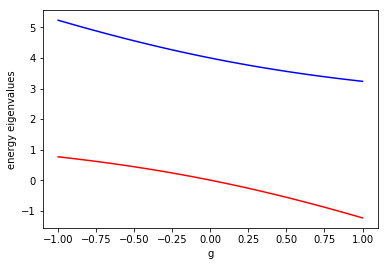

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

def eigenvals(g1,eps):
    e1 = eps-g1 - np.sqrt(g1**2 + eps**2)
    e2 = eps-g1 + np.sqrt(g1**2 + eps**2)
    return e1,e2
    

g= np.linspace(-1.0,1.0) #in MeV
eps = 2.0 #in MeV
E1 = []
E2 = []
for i in range(len(g)):
    e1,e2 = eigenvals(g[i],eps)
    E1.append(e1)
    E2.append(e2)
    
plt.plot(g,E1,'r',g,E2,'b')
plt.xlabel('g')
plt.ylabel('energy eigenvalues')
plt.legend()